# Ambientes virtuales y requerimiento de módulos

In [5]:
# Enviando un requerimiento y logeando el codigo de respuesta
import requests
r = requests.get('https://api.github.com/users/Bocafloja')
print(r)
print(type(r))

<Response [200]>
<class 'requests.models.Response'>


In [6]:
# Accediendo al contenido que se requirió de la URL
data = r.content
print(data) # Los datos vienen en json (JavaScript Object Notation)

b'{"login":"Bocafloja","id":55412834,"node_id":"MDQ6VXNlcjU1NDEyODM0","avatar_url":"https://avatars3.githubusercontent.com/u/55412834?v=4","gravatar_id":"","url":"https://api.github.com/users/Bocafloja","html_url":"https://github.com/Bocafloja","followers_url":"https://api.github.com/users/Bocafloja/followers","following_url":"https://api.github.com/users/Bocafloja/following{/other_user}","gists_url":"https://api.github.com/users/Bocafloja/gists{/gist_id}","starred_url":"https://api.github.com/users/Bocafloja/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/Bocafloja/subscriptions","organizations_url":"https://api.github.com/users/Bocafloja/orgs","repos_url":"https://api.github.com/users/Bocafloja/repos","events_url":"https://api.github.com/users/Bocafloja/events{/privacy}","received_events_url":"https://api.github.com/users/Bocafloja/received_events","type":"User","site_admin":false,"name":"Bocafloja","company":null,"blog":"https://twitter.com/rikacdo","locati

In [7]:
# Convirtiendo los datos de json a un diccionario de python
data = r.json()
for k, v in data.items():
    print('Key: {} \t Valor: {}'.format(k,v))
print(data['name'])

Key: login 	 Valor: Bocafloja
Key: id 	 Valor: 55412834
Key: node_id 	 Valor: MDQ6VXNlcjU1NDEyODM0
Key: avatar_url 	 Valor: https://avatars3.githubusercontent.com/u/55412834?v=4
Key: gravatar_id 	 Valor: 
Key: url 	 Valor: https://api.github.com/users/Bocafloja
Key: html_url 	 Valor: https://github.com/Bocafloja
Key: followers_url 	 Valor: https://api.github.com/users/Bocafloja/followers
Key: following_url 	 Valor: https://api.github.com/users/Bocafloja/following{/other_user}
Key: gists_url 	 Valor: https://api.github.com/users/Bocafloja/gists{/gist_id}
Key: starred_url 	 Valor: https://api.github.com/users/Bocafloja/starred{/owner}{/repo}
Key: subscriptions_url 	 Valor: https://api.github.com/users/Bocafloja/subscriptions
Key: organizations_url 	 Valor: https://api.github.com/users/Bocafloja/orgs
Key: repos_url 	 Valor: https://api.github.com/users/Bocafloja/repos
Key: events_url 	 Valor: https://api.github.com/users/Bocafloja/events{/privacy}
Key: received_events_url 	 Valor: https:/

In [8]:
# Mostrando un valor especifico
r = requests.get("https://api.github.com/search/repositories?q=language:python")
data = r.json()    # q=language:python es un parámetro específico a obtener despues de un '?'
print(data['total_count'])

5309302


# Pandas

In [1]:
# Importando la librería pandas
import pandas as pd 

In [2]:
# Usando el método from_dict()
import random

random.seed(3)

nombres = ["Jess", "Jordan", "Sandy", "Ted", "Barney", "Tyler", "Rebecca"]
edades = [random.randint(18,35) for x in range(len(nombres))]

gente = {'nombres':nombres, 'edades':edades}

df = pd.DataFrame.from_dict(gente)
df


,nombres,edades
0,Jess,25
1,Jordan,35
2,Sandy,22
3,Ted,29
4,Barney,33
5,Tyler,20
6,Rebecca,18


In [33]:
# Accediendo a los datos de un data frame
print(df['edades'])
print('-'*27)
print(type(df['edades'][3]))
#print(df[4])   # No sirve, '4' no es el nombre de ninguna columna

---------------------------
<class 'numpy.int64'>


In [27]:
# Indexando por localización (index)
print(df.loc[0])
print('-'*23)
print(df.loc[0]['nombres'])

'Jess'

In [23]:
# Cortando dataframes
df[2:5]

,nombres,edades
2,Sandy,22
3,Ted,29
4,Barney,33


In [22]:
# Accediendo los primeros 5 records usando .head()
df.head(5)

,nombres,edades
0,Jess,25
1,Jordan,35
2,Sandy,22
3,Ted,29
4,Barney,33


In [29]:
# Accediendo los 3 últimos con .tail()
df.tail(3)

,nombres,edades
4,Barney,33
5,Tyler,20
6,Rebecca,18


In [32]:
# Obteniendo las cabeceras
df.keys()

Index(['nombres', 'edades'], dtype='object')

In [35]:
# Mirando el tamaño del dataFrame
df.shape

(7, 2)

In [36]:
# Revisar la estadística general del dataFrame usando .describe()
df.describe() # Sólo tiene en cuenta las columnas numéricas

,edades
count,7.000000
mean,26.000000
std,6.531973
min,18.000000
25%,21.000000
50%,25.000000
75%,31.000000
max,35.000000


In [6]:
# Organizar una columna
df = df.sort_values('edades')
df # Todos se organizan en orden de edades

,nombres,edades
6,Rebecca,18
5,Tyler,20
2,Sandy,22
0,Jess,25
3,Ted,29
4,Barney,33
1,Jordan,35


In [5]:
# Usando condicionales
puede_beber = df['edades'] >= 21
puede_beber

0     True
1     True
2     True
3     True
4     True
5    False
6    False
Name: edades, dtype: bool

In [8]:
# Uso de subsetting para filtrar y dejar el df intacto
df[df['edades'] >= 21]

,nombres,edades
2,Sandy,22
0,Jess,25
3,Ted,29
4,Barney,33
1,Jordan,35


In [6]:
# Es lo mismo que el subsetting
df[puede_beber]

,nombres,edades
0,Jess,25
1,Jordan,35
2,Sandy,22
3,Ted,29
4,Barney,33


In [3]:
# Generando una nueva columna con datos falsos
random.seed(321)
tenencia = [random.randint(0,10) for x in range(len(df))]
df['Tenencia'] = tenencia
df.head()

,nombres,edades,Tenencia
0,Jess,25,4
1,Jordan,35,6
2,Sandy,22,2
3,Ted,29,5
4,Barney,33,8


In [5]:
# Aplicar una función a una columna específca
def grupoEdad(edad):
    return 'Adolescente' if edad<21 else 'Adulto'
df['grupo_edad'] = df['edades'].apply(grupoEdad)
df.head(10)

,nombres,edades,Tenencia,grupo_edad
0,Jess,25,4,Adulto
1,Jordan,35,6,Adulto
2,Sandy,22,2,Adulto
3,Ted,29,5,Adulto
4,Barney,33,8,Adulto
5,Tyler,20,7,Adolescente
6,Rebecca,18,5,Adolescente


# Matplotlib

In [1]:
# Importando la librería matplotlib
from matplotlib import pyplot as plt

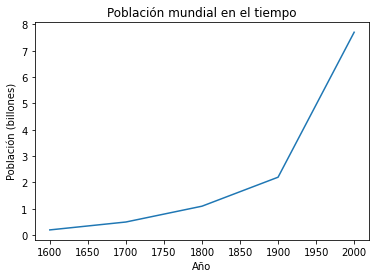

In [4]:
# Creando una curva continua usando coordenadas x, y
x, y =  [ 1600, 1700, 1800, 1900, 2000 ] , [ 0.2, 0.5, 1.1, 2.2, 7.7 ]
plt.plot(x, y)
plt.title('Población mundial en el tiempo')
plt.xlabel('Año')
plt.ylabel('Población (billones)')
plt.show()

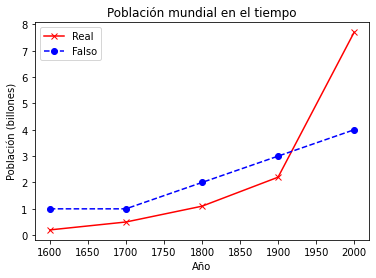

In [6]:
# Con diferentes curvas
x1, y1 =  [ 1600, 1700, 1800, 1900, 2000 ] , [ 0.2, 0.5, 1.1, 2.2, 7.7 ]
x2, y2 = [ 1600, 1700, 1800, 1900, 2000 ] , [ 1, 1, 2, 3, 4 ]
plt.plot(x1, y1, 'rx-', label='Real')
plt.plot(x2, y2, 'bo--', label='Falso')
plt.title('Población mundial en el tiempo')
plt.xlabel('Año')
plt.ylabel('Población (billones)')
plt.legend()
plt.show()

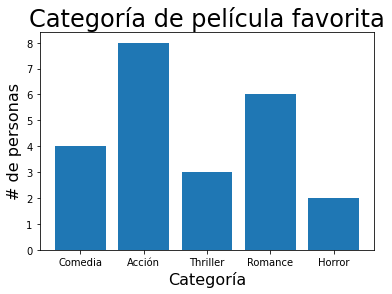

In [10]:
# Gráfico de barras
num_personas, categorias =  [ 4, 8, 3, 6, 2 ] , [ 'Comedia', 'Acción', 'Thriller', 'Romance', 'Horror' ]
plt.bar(categorias, num_personas)
plt.title('Categoría de película favorita', fontsize=24)
plt.xlabel('Categoría', fontsize=16)
plt.ylabel('# de personas', fontsize=16)
plt.xticks(fontname='Fantasy')
plt.yticks(fontname='Fantasy')
plt.show()

/home/bocafloja/anaconda3/envs/data_analysis/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


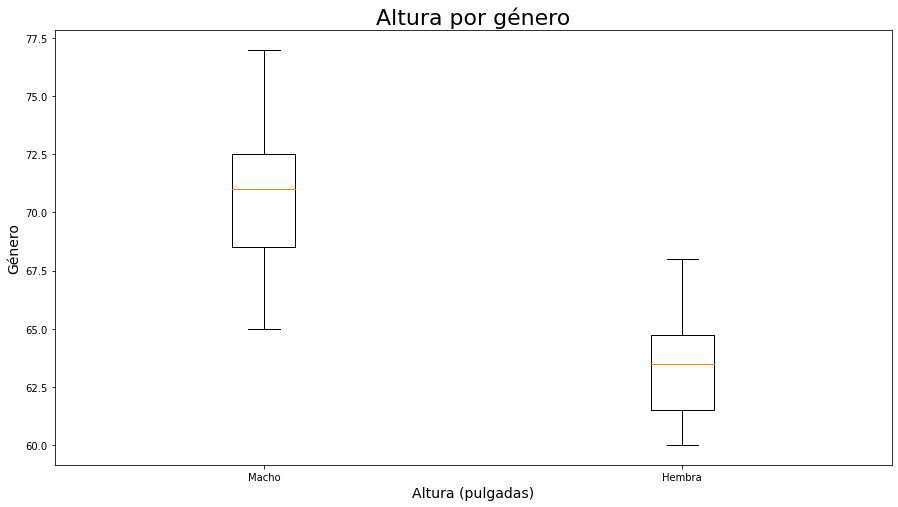

In [12]:
# Gráfico de barra y bigotes
machos, hembras =  [ 72, 68, 65, 77, 73, 71, 69 ] , [ 60, 65, 68, 61, 63, 64]
alturas = [machos, hembras]
plt.figure(figsize=(15,8))
plt.boxplot(alturas)
plt.xticks( [1,2], ['Macho', 'Hembra'])
plt.title('Altura por género', fontsize = 22)
plt.xlabel('Altura (pulgadas)', fontsize = 14)
plt.ylabel('Género', fontsize = 14)
plt.show()

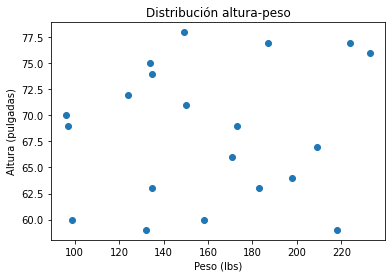

In [5]:
# Gráfico de dispersión
import random
from random import randint
random.seed(2)
altura = [randint(58, 78) for x in range(20)]
peso = [randint(90, 250) for x in range(20)]

plt.scatter(peso, altura)
plt.title('Distribución altura-peso')
plt.xlabel('Peso (lbs)')
plt.ylabel('Altura (pulgadas)')
plt.show()

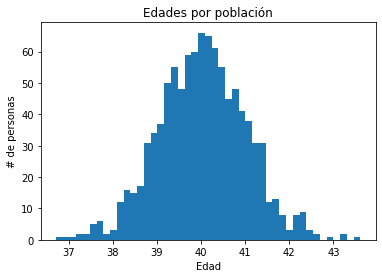

In [7]:
# Histograma
import numpy as np
np.random.seed(5)
edades = [np.random.normal(loc=40, scale=1) for x in range(1000)] # Edades distribuidas alrededor de 40 años
plt.hist(edades, bins=45) # bins es el número de barras
plt.title('Edades por población')
plt.xlabel('Edad')
plt.ylabel('# de personas')
plt.show()

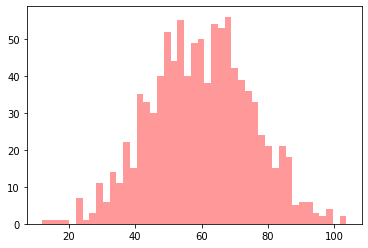

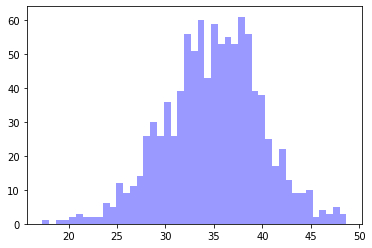

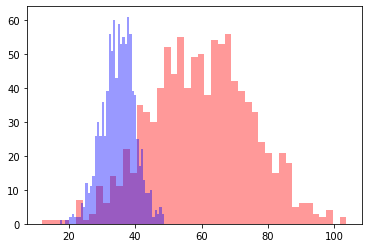

In [12]:
florida = [np.random.normal(loc=60, scale=15) for x in range(1000)]
california = [np.random.normal(loc=35, scale=5) for x in range(1000)]
# Histograma 1
plt.hist(florida, bins=45, color='r', alpha=0.4) # alpha es la opacidad
plt.show()
# Histograma 2
plt.hist(california, bins=45, color='b', alpha=0.4)
plt.show()
#Histograma 3
plt.hist(florida, bins=45, color='r', alpha=0.4)
plt.hist(california, bins=45, color='b', alpha=0.4)
plt.show()

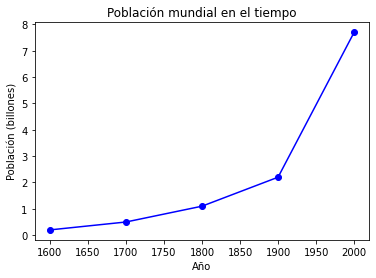

In [14]:
# Guardar gráficos como imágenes
x, y =  [ 1600, 1700, 1800, 1900, 2000 ] , [ 0.2, 0.5, 1.1, 2.2, 7.7 ]
plt.plot(x, y, 'bo-')  #Una línea azul contínua con círculos en puntos
plt.title('Población mundial en el tiempo')
plt.xlabel('Año')
plt.ylabel('Población (billones)')
plt.savefig('Población.png')

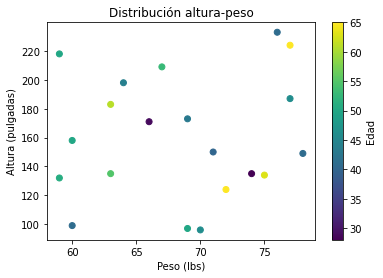

In [15]:
# Aplanando datos multidimensionales
import random
from random import randint
random.seed(2)
altura = [randint(58, 78) for x in range(20)]
peso = [randint(90, 250) for x in range(20)]
edad = [randint(18, 65) for x in range(20)]

plt.scatter(altura, peso, c=edad) # Pone la edad con colores
plt.title('Distribución altura-peso')
plt.xlabel('Peso (lbs)')
plt.ylabel('Altura (pulgadas)')
plt.colorbar(label='Edad')  # Muestra la barra de colores
plt.show()

# Web scraping

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
pagina = requests.get("http://www.arthurleej.com/e-love.html")
print(pagina)

<Response [200]>


In [4]:
print(pagina.content)

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\r<html>\r<head>\r\t<title>Essay on Love by Arthur Lee Jacobson</title>\r<meta name="description" content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson.">\r<meta name="keywords" content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington">\r<meta name="resource-type" content="document">\r<meta name="generator" content="BBEdit 4.5">\r<meta name="robots" content="all">\r<meta name="classification" content="Gardening">\r<meta name="distribution" content="global">\r<meta name="rating" content="general">\r<meta name="copyright" content="2001 Arthur Lee Jacobson">\r<meta name="author" content="eriktyme@eriktyme.com">\r<meta name="language" content="en-us">\r</head>\r<body background="images/background1a.jpg" bgcolor="#FFFFCC" text="#000000" link="#00

In [5]:
# Transformando la respuesta a BeautifulSoup para extraer los datos
soup = BeautifulSoup(pagina.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
 <head>
  <title>
   Essay on Love by Arthur Lee Jacobson
  </title>
  <meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/>
  <meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/>
  <meta content="document" name="resource-type"/>
  <meta content="BBEdit 4.5" name="generator"/>
  <meta content="all" name="robots"/>
  <meta content="Gardening" name="classification"/>
  <meta content="global" name="distribution"/>
  <meta content="general" name="rating"/>
  <meta content="2001 Arthur Lee Jacobson" name="copyright"/>
  <meta content="eriktyme@eriktyme.com" name="author"/>
  <meta content="en-us" name="language"/>
 </head>
 <body alink="#33CC33" background="images/background1a.jpg" b

# To be continued....